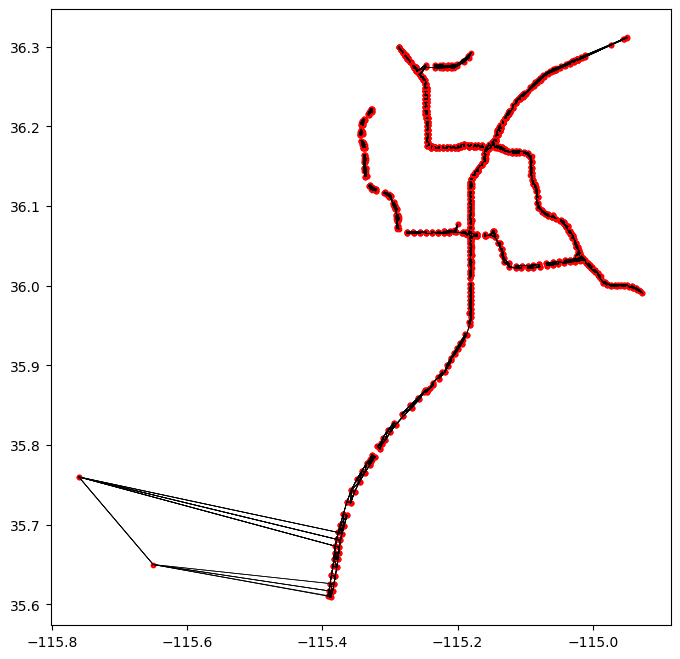

In [9]:
import pandas as pd
from geopy.distance import great_circle
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from heapq import nsmallest

# Define the number of nodes to create connections for
num_connections = 10

# Define the ignore list
ignore_list = [(36.068619, -115.211891), (41.2345, -112.6789), (42.3456, -113.7890)]

# Read node locations from a CSV file
data = pd.read_csv('./detector/detectors2018.csv')
latitude = data.iloc[:, 5].astype(str).apply(lambda x: float(x[:2] + '.' + x[2:]))
longitude = data.iloc[:, 6].astype(str).apply(lambda x: float(x[:4] + '.' + x[4:]))
ids = data.iloc[:, 1]

# Create a tuple of latitude and longitude values for each location
locations = np.column_stack((latitude, longitude))

# Check if each location is in the ignore list and remove it if it is
for i, loc in enumerate(locations):
    if tuple(loc) in ignore_list:
        locations = np.delete(locations, i, axis=0)
        ids = np.delete(ids, i)

# Calculate the distance matrix between all remaining locations
dist_matrix = distance_matrix(locations, locations)

# Create an empty graph
graph = {}

# Add each remaining location as a node to the graph
for i in range(len(locations)):
    graph[i] = []

# Connect each node to the closest num_connections nodes
for i in range(len(locations)):
    closest = nsmallest(num_connections+1, range(len(dist_matrix[i])), key=lambda x: dist_matrix[i][x])
    closest.remove(i)
    for j in closest:
        graph[i].append(j)

# Plot the graph
plt.figure(figsize=(8, 8))
for i in range(len(locations)):
    for j in graph[i]:
        plt.plot([locations[i][1], locations[j][1]], [locations[i][0], locations[j][0]], 'k-', linewidth=0.5)
plt.scatter(locations[:,1], locations[:,0], s=10, c='r')
plt.show()
